## PREDICT PATIENT SURVIVAL RATE USING DATA FROM FIRST 24HOURS OF INTENSIVE CARE

MIT's GOSSIS community initiative, with privacy certification from the Harvard Privacy Lab, has provided a dataset of more than 130,000 hospital Intensive Care Unit (ICU) visits from patients, spanning a one-year timeframe. This data is part of a growing global effort and consortium spanning Argentina, Australia, New Zealand, Sri Lanka, Brazil, and more than 200 hospitals in the United States.
___

### I.IMPORT LIBRARIES

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objs as go
from plotly import tools
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
%matplotlib inline

import datetime, warnings, scipy 
from scipy.stats import pearsonr
import matplotlib as mpl
import matplotlib.patches as patches
from matplotlib.patches import ConnectionPatch
from collections import OrderedDict
from matplotlib.gridspec import GridSpec
from scipy.optimize import curve_fit
from collections import Counter
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"

import missingno as msno

# warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Set standard parameters
pd.options.display.float_format = '{:.1f}'.format
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', -1)

In [2]:
from google.colab import drive
drive.mount("/content/drive/", force_remount=True)
!ls "/content/drive/My Drive"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/
Deep_Learning_Project  Healthcare  ML_Project


In [0]:
# !pip install tf-nightly-gpu-2.0-preview

In [0]:
# import tensorflow as tf
# device_name = tf.test.gpu_device_name()
# if device_name != '/device:GPU:0':
#   raise SystemError('GPU not found')
# print('Found GPU at :{}'.format(device_name))

### II.IMPORT DATA

In [0]:
df = pd.read_csv('/content/drive/My Drive/Healthcare/Data/training_v2.csv', low_memory = False)
dictionary = pd.read_csv('/content/drive/My Drive/Healthcare/Data/WiDS Datathon 2020 Dictionary.csv')

In [4]:
df.head(2)

encounter_id  patient_id  hospital_id  hospital_death  age  bmi  elective_surgery  ethnicity gender  height hospital_admit_source icu_admit_source  icu_id icu_stay_type      icu_type  pre_icu_los_days  readmission_status  weight  albumin_apache  apache_2_diagnosis  apache_3j_diagnosis  apache_post_operative  arf_apache  bilirubin_apache  bun_apache  creatinine_apache  fio2_apache  gcs_eyes_apache  gcs_motor_apache  gcs_unable_apache  gcs_verbal_apache  glucose_apache  heart_rate_apache  hematocrit_apache  intubated_apache  map_apache  paco2_apache  paco2_for_ph_apache  pao2_apache  ph_apache  resprate_apache  sodium_apache  temp_apache  urineoutput_apache  ventilated_apache  wbc_apache  d1_diasbp_invasive_max  d1_diasbp_invasive_min  d1_diasbp_max  d1_diasbp_min  d1_diasbp_noninvasive_max  d1_diasbp_noninvasive_min  d1_heartrate_max  d1_heartrate_min  d1_mbp_invasive_max  d1_mbp_invasive_min  d1_mbp_max  d1_mbp_min  d1_mbp_noninvasive_max  d1_mbp_noninvasive_min  d1_resprate_max  \
0  66154         25312       118          0              68.0 22.7  0                 Caucasian  M     180.3    Floor                 Floor            92      admit         CTICU        0.5                0                  73.9    2.3             113.0               502.0                 0                     0.0         0.4               31.0        2.5                nan          3.0              6.0               0.0                4.0                168.0           118.0              27.4               0.0               40.0        nan           nan                  nan          nan        36.0             134.0          39.3         nan                 0.0                14.1        46.0                    32.0                    68.0           37.0           68.0                       37.0                       119.0             72.0              66.0                 40.0                 89.0        46.0        89.0                    46.0                    34.0               
1  114252        59342       81           0              77.0 27.4  0                 Caucasian  F     160.0    Floor                 Floor            90      admit         Med-Surg ICU 0.9                0                  70.2    nan             108.0               203.0                 0                     0.0         nan               9.0         0.6                1.0          1.0              3.0               0.0                1.0                145.0           120.0              36.9               0.0               46.0        37.0          37.0                 51.0         7.5        33.0             145.0          35.1         nan                 1.0                12.7        nan                     nan                     95.0           31.0           95.0                       31.0                       118.0             72.0              nan                  nan                  120.0       38.0        120.0                   38.0                    32.0               

   d1_resprate_min  d1_spo2_max  d1_spo2_min  d1_sysbp_invasive_max  d1_sysbp_invasive_min  d1_sysbp_max  d1_sysbp_min  d1_sysbp_noninvasive_max  d1_sysbp_noninvasive_min  d1_temp_max  d1_temp_min  h1_diasbp_invasive_max  h1_diasbp_invasive_min  h1_diasbp_max  h1_diasbp_min  h1_diasbp_noninvasive_max  h1_diasbp_noninvasive_min  h1_heartrate_max  h1_heartrate_min  h1_mbp_invasive_max  h1_mbp_invasive_min  h1_mbp_max  h1_mbp_min  h1_mbp_noninvasive_max  h1_mbp_noninvasive_min  h1_resprate_max  h1_resprate_min  h1_spo2_max  h1_spo2_min  h1_sysbp_invasive_max  h1_sysbp_invasive_min  h1_sysbp_max  h1_sysbp_min  h1_sysbp_noninvasive_max  h1_sysbp_noninvasive_min  h1_temp_max  h1_temp_min  d1_albumin_max  d1_albumin_min  d1_bilirubin_max  d1_bilirubin_min  d1_bun_max  d1_bun_min  d1_calcium_max  d1_calcium_min  d1_creatinine_max  d1_creatinine_min  d1_glucose_max  d1_glucose_min  d1_hco3_max  d1_hco3_min  d1_hemaglobin_max  d1_hemaglobin_min  d1_hematocrit_max  d1_hematocrit_min  \
0 10.0      

___
### III.FUCTIONS

In [0]:
def check_missing_df(df):
    # look at how many missing values for the columns
    missing_values_count= df.isnull().sum()
    missing_values_percentage=np.round(df.isnull().sum()/df.shape[0]*100,2)

    #show it in dataframe
    data = {'Number_missing':missing_values_count, 'Missing_percentage':missing_values_percentage} 
    
    # Create DataFrame 
    missing_info = pd.DataFrame(data) 
    
    # Print the output. 
    display(missing_info.sort_values('Missing_percentage',ascending = False))

In [0]:
def plot_by_target(cols):
    fig, ax = plt.subplots(2, 2, figsize=(12, 7))

    X=[]
    for (i,j) in zip(cols[:2],cols[2:]):
        ax1 = sns.distplot(target_0[i], hist=True, kde=True, ax = ax[1][0])
        ax2 = sns.distplot(target_1[i], hist=True, kde=True, ax = ax[0][0])
        ax3 = sns.distplot(target_0[j], hist=True, kde=True, ax = ax[1][1])
        ax4 = sns.distplot(target_1[j], hist=True, kde=True, ax = ax[0][1])
        x_max = df[cols].describe()[7:].max(axis = 1)[0] + 1
        x_min = df[cols].describe()[3:4].min(axis = 1)[0] - 1
        X.extend([h.get_height() for h in ax1.patches])
        X.extend([h.get_height() for h in ax2.patches])
        X.extend([h.get_height() for h in ax3.patches])
        X.extend([h.get_height() for h in ax4.patches])
        ax[0][1].legend(['max','min'])
        y_max = max(X)
        ax1.set_xlim([x_min, x_max])
        ax2.set_xlim([x_min, x_max])
        ax3.set_xlim([x_min, x_max])
        ax4.set_xlim([x_min, x_max])
        ax1.set_ylim([0, y_max])
        ax2.set_ylim([0, y_max])
        ax3.set_ylim([0, y_max])
        ax4.set_ylim([0, y_max])
        ax1.set_xlabel("")
        ax2.set_xlabel("")
        ax3.set_xlabel("")
        ax4.set_xlabel("")
        ax1.set_title(i[:-4]+"_survived")
        ax2.set_title(i[:-4]+"_death")
        ax3.set_title(j[:-4]+"_survived")
        ax4.set_title(j[:-4]+"_death")

In [0]:
def plot_distribution(df, var, target, **kwargs):
    row = kwargs.get('row', None)
    col = kwargs.get('col', None)
    facet = sns.FacetGrid(df, hue=target, aspect=4, row = row, col = col )
    facet.map(sns.kdeplot, var, shade= True )
    facet.set(xlim=(df[var].min(), df[var].max()))
    facet.add_legend()

___
### Dictionary

Learn more about the measurements: 

https://www.anzics.com.au/wp-content/uploads/2018/08/ANZICS-APD-Data-Dictionary.pdf

In [8]:
X=pd.DataFrame(dictionary.T.head(6))
X.columns=list(X.loc[X.index == 'Variable Name'].unstack())
X = X.loc[X.index != 'Variable Name']
df_dictionary = pd.DataFrame(df.describe())
df_dictionary = pd.concat([X,df_dictionary],axis=0)
df_dictionary.head(15)

age                                                                                                                   aids                                                                                              albumin_apache                      apache_2_bodysystem                             apache_2_diagnosis                      apache_3j_bodysystem                                                                        apache_3j_diagnosis                                                                                                                                    apache_4a_hospital_death_prob                                                                                                                                   apache_4a_icu_death_prob                                                   apache_post_operative  \
Category         demographic                               APACHE comorbidity                                                                                                     APACHE covariate                                                                                            APACHE grouping                          APACHE covariate                               APACHE grouping                           APACHE covariate                                                                           APACHE prediction                                                                                                                                                APACHE prediction                                                                                                                                          APACHE covariate                                                         
Unit of Measure  Years                                     None                                                                                                                   g/L                                                                                                         None                                     None                                           None                                      None                                                                                       None                                                                                                                                                             None                                                                                                                                                       None                                                                     
Data Type        numeric                                   binary                                                                                                                 numeric                                                                                                     string                                   string                                         string                                    string                                                                                     numeric                                                                                                                                                          numeric                                                                                                                                                    binary                                                                   
Description      The age of the patient on unit admission  Whether the patient has a definitive diagnosis of acquired immune deficiency syndrome (AIDS) (not HIV positive alone)  The albumin concentration measured during the first 24 hours which results in the highest APACHE III score  Admission diagnosis group for APACHE II  The APACHE II diagnosis for the ICU admission  Admission diagnosis group for APACHE III  The APACHE III-J sub-diagnosis code which best des

In [9]:
# Transpose dictionary
df_dictionary.T.head(20)

Category         Unit of Measure Data Type                                                                                                                                                                                                                                                                            Description         Example   count  mean   std   min   25%   50%   75%    max
age                            demographic         Years                   numeric   The age of the patient on unit admission                                                                                                                                                                                                                                               None           87485.0 62.3  16.8  16.0  52.0  65.0  75.0  89.0  
aids                           APACHE comorbidity  None                    binary    Whether the patient has a definitive diagnosis of acquired immune deficiency syndrome (AIDS) (not HIV positive alone)                                                                                                                                                                  1              90998.0 0.0   0.0   0.0   0.0   0.0   0.0   1.0   
albumin_apache                 APACHE covariate    g/L                     numeric   The albumin concentration measured during the first 24 hours which results in the highest APACHE III score                                                                                                                                                                             30             37334.0 2.9   0.7   1.2   2.4   2.9   3.4   4.6   
apache_2_bodysystem            APACHE grouping     None                    string    Admission diagnosis group for APACHE II                                                                                                                                                                                                                                                Respiratory     NaN     NaN   NaN   NaN   NaN   NaN   NaN   NaN  
apache_2_diagnosis             APACHE covariate    None                    string    The APACHE II diagnosis for the ICU admission                                                                                                                                                                                                                                          308            90051.0 185.4 86.1  101.0 113.0 122.0 301.0 308.0 
apache_3j_bodysystem           APACHE grouping     None                    string    Admission diagnosis group for APACHE III                                                                                                                                                                                                                                               Cardiovascular  NaN     NaN   NaN   NaN   NaN   NaN   NaN   NaN  
apache_3j_diagnosis            APACHE covariate    None                    string    The APACHE III-J sub-diagnosis code which best describes the reason for the ICU admission                                                                                                                                                                                              1405           90612.0 558.2 463.3 0.0   203.0 409.0 703.0 2201.1
apache_4a_hospital_death_prob  APACHE prediction   None                    numeric   The APACHE IVa probabilistic prediction of in-hospital mortality for the patient which utilizes the APACHE III score and other covariates, including diagnosis.                                                                                                                        0.31           83766.0 0.1   0.2   -1.0  0.0   0.1   0.1   1.0   
apache_4a_icu_death_prob       APACHE prediction   None                    numeric   The APACHE IVa probabilistic prediction of in ICU mortality for the patient which util

In [0]:
# Category within dictionary
dictionary.Category.unique()

array(['identifier', 'demographic', 'APACHE covariate', 'vitals', 'labs',
       'labs blood gas', 'APACHE prediction', 'APACHE comorbidity',
       'APACHE grouping', 'GOSSIS example prediction'], dtype=object)

In [0]:
dictionary[dictionary['Category']=='identifier']

Category Variable Name Unit of Measure Data Type                                            Description Example
0  identifier  encounter_id  None            integer   Unique identifier associated with a patient unit stay  None  
1  identifier  hospital_id   None            integer   Unique identifier associated with a hospital           None  
2  identifier  patient_id    None            integer   Unique identifier associated with a patient            None

___
__KEY NOTES:__

|CATEGORY| NOTES|
|--|--|
|GOSSIS example prediction | drop, just an example of prediction provided
|identifier | `counter_id`, `patient_id`, `hospital_id`. Check out `hospital_id` since the death_rate is different by hospital. However, should not bring it to modeling (model biased)
|labs, vitals, labs blood gas| We have both 24hrs and 1st hour measurements, however, higher percentage of missing values belong to 1st hours measurement features (80% missing)
|APACHE prediction| 2 feautures: probabilistic prediction of *in-hospital* and *ICU* **mortality**
|APACHE comorbidity| Binary (8 columns) | Whether the patient has been diagnosed with a specific ailment or not: AIDS, cirrhosis, diabetes_mellitus, hepatic_failure, immunosupression, leukemia, lyphoma, solid tumor with metastasis
|APACHE grouping | Read in detailed
|APACHE coveriate | Read in detailed



___
### III. CHECKING MISSING VALUES

All of the maps below represent the missing values using missingo package. The correlation map lets you know which features are missing together.

In [0]:
check_missing_df(df)

Number_missing  Missing_percentage
h1_bilirubin_min               84619          92.3               
h1_bilirubin_max               84619          92.3               
h1_lactate_max                 84369          92.0               
h1_lactate_min                 84369          92.0               
h1_albumin_max                 83824          91.4               
h1_albumin_min                 83824          91.4               
h1_pao2fio2ratio_min           80195          87.4               
h1_pao2fio2ratio_max           80195          87.4               
h1_arterial_ph_max             76424          83.3               
h1_arterial_ph_min             76424          83.3               
h1_hco3_max                    76094          83.0               
h1_hco3_min                    76094          83.0               
h1_wbc_max                     75953          82.8               
h1_arterial_pco2_min           75959          82.8               
h1_arterial_pco2_max           75959          82.8               
h1_wbc_min                     75953          82.8               
h1_arterial_po2_max            75945          82.8               
h1_arterial_po2_min            75945          82.8               
h1_calcium_max                 75863          82.7               
h1_calcium_min                 75863          82.7               
h1_platelets_max               75673          82.5               
h1_platelets_min               75673          82.5               
h1_bun_max                     75091          81.9               
h1_bun_min                     75091          81.9               
h1_creatinine_max              74957          81.7               
h1_creatinine_min              74957          81.7               
h1_diasbp_invasive_min         74928          81.7               
h1_diasbp_invasive_max         74928          81.7               
h1_sysbp_invasive_max          74915          81.7               
h1_sysbp_invasive_min          74915          81.7               
h1_mbp_invasive_min            74844          81.6               
h1_mbp_invasive_max            74844          81.6               
h1_hematocrit_max              73420          80.0               
h1_hematocrit_min              73420          80.0               
h1_hemaglobin_min              73123          79.7               
h1_hemaglobin_max              73123          79.7               
h1_sodium_min                  72617          79.2               
h1_sodium_max                  72617          79.2               
h1_potassium_max               72102          78.6               
h1_potassium_min               72102          78.6               
pao2_apache                    70868          77.3               
ph_apache                      70868          77.3               
paco2_for_ph_apache            70868          77.3               
paco2_apache                   70868          77.3               
fio2_apache                    70868          77.3               
d1_lactate_max                 68396          74.6               
d1_lactate_min                 68396          74.6               
d1_diasbp_invasive_min         67984          74.1               
d1_diasbp_invasive_max         67984          74.1               
d1_sysbp_invasive_min          67959          74.1               
d1_sysbp_invasive_max          67959          74.1               
d1_mbp_invasive_max            67777          73.9               
d1_mbp_invasive_min            67777          73.9               
d1_pao2fio2ratio_min           66008          72.0               
d1_pao2fio2ratio_max           66008          72.0               
d1_arterial_ph_max             60123          65.6               
d1_arterial_ph_min             60123          65.6               
d1_arterial_pco2_max           59271          64.6               
d1_arterial_pco2_min           59271          64.6               
d1_arterial_po2_min            59262          64.6               
d1_ar

__KEY NOTES__

|CATEOGRY| NOTES|
|--|--|
|demographic |`bmi`,`height`, and `weight` are often missing together. Check `hospital_admi_source` ( higher % if missing values)
|APACHE covariate| high % of missing values for these features: `albumin_apche`, `bilirubin_apache`, `fio2_apache`, `paco2_apache`, `paco2_for_ph_apache`, `pao2_apache`, `ph_apache`, `urineoutput_apache`.GO DEEPDIVE INTO THOSE FEATURES
|vitals | anything with `invasive` are missing a lot of values. The rest can be imputed. Homework: Check how noninvasive, invasive and normal measurements are different. Can we use one of them instead?
|labs| most of data within 1 hours admitted are missing >> plot the difference bt 1st hr and 24hrs, diff bt max and min value, should vary by features. Check out `inr`,`lactate`,`albumin`, and `bilirubin`, a lot of missing values, even using 24hours results.
|labs blood gas | Check how importance these features are. Most of them are missing. 
|APACHE prediction | if one of the 2 features has missing values, the other also has missing values
|APACHE comorbidity| very few missing value. Can be imputed
|APACHE grouping |  `apache2_bodysystem` and `apache3_bodysystem` are missing together. Check out what is the difference bt these two. Should only keep one of them in modeling

APACHE covariate


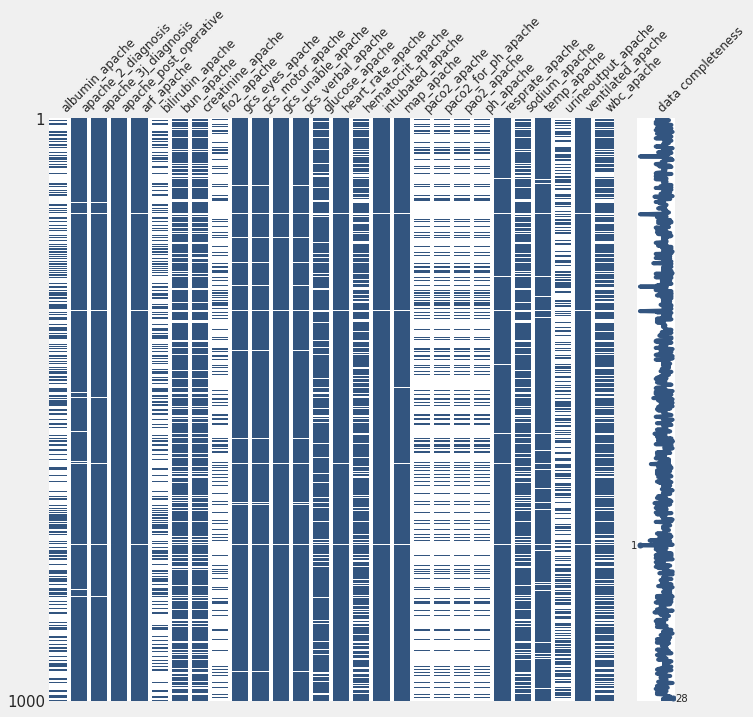

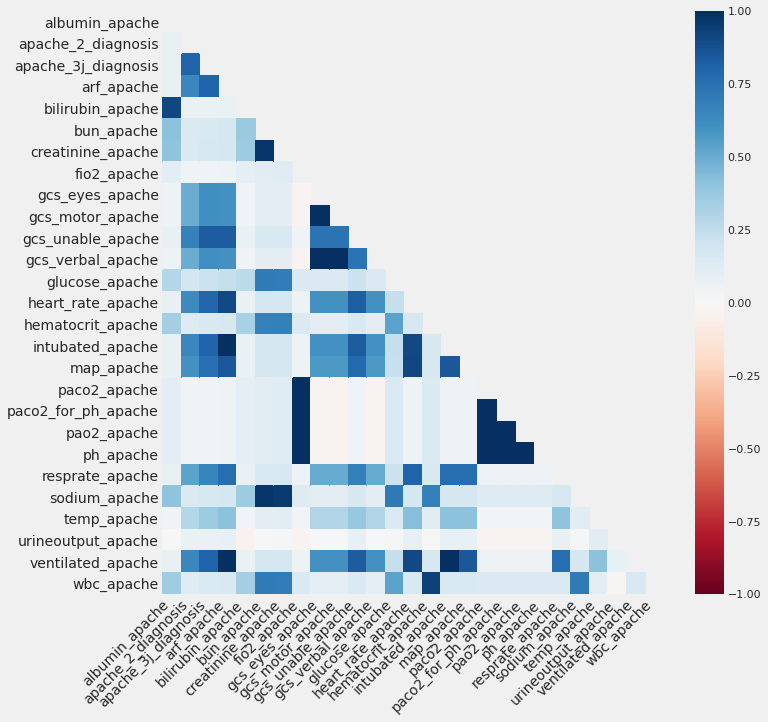

vitals


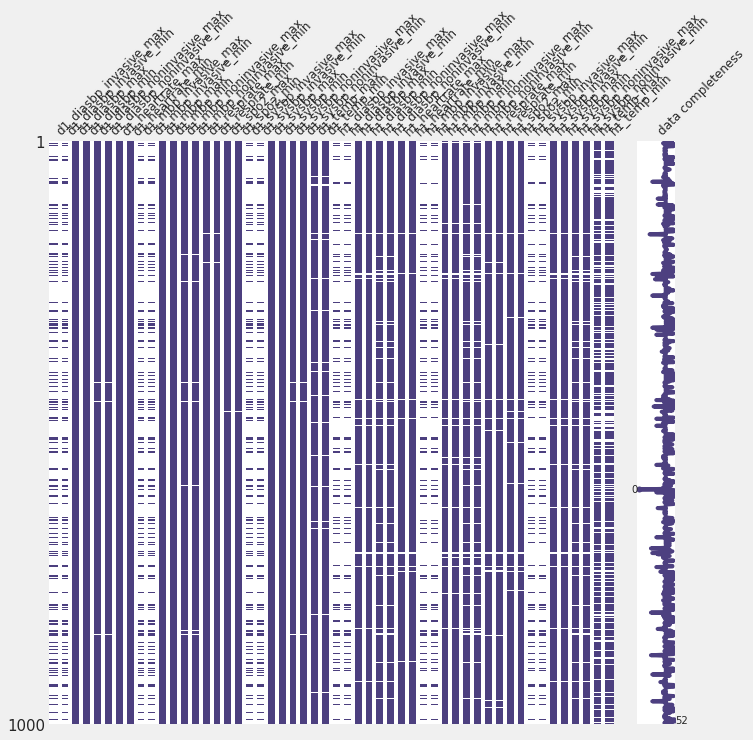

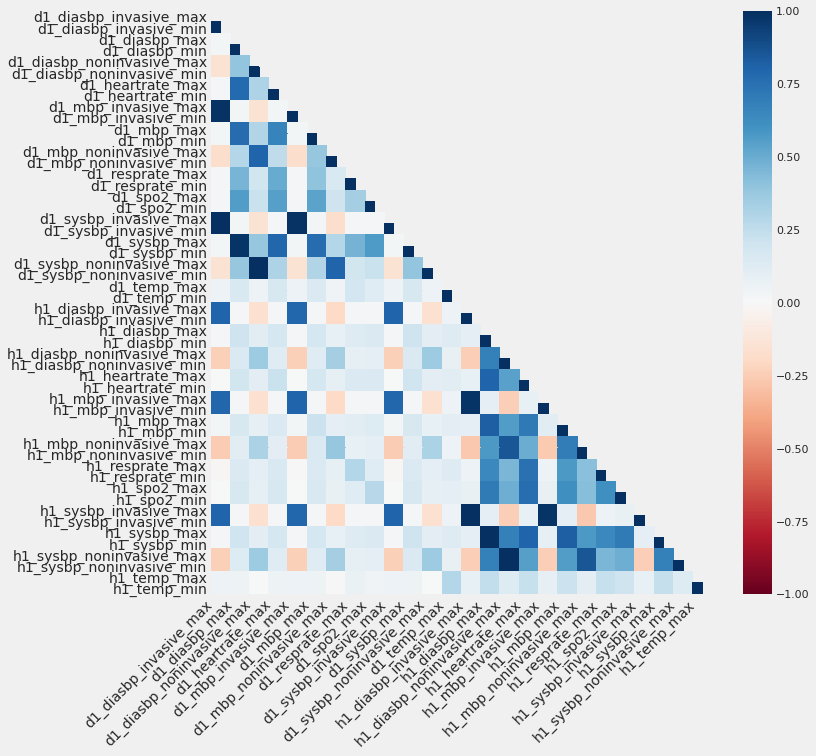

In [10]:
for color, variable in enumerate(dictionary['Category'].unique()):
  if variable not in ['GOSSIS example prediction','identifier', 'demographic', 'labs', 'labs blood gas', 'APACHE prediction', 'APACHE comorbidity', 'APACHE grouping']:
    print(variable)
    col_list = list(dictionary[dictionary['Category']==variable]['Variable Name'].values)
    col_list = [i for i in col_list if i in df.columns]
    if len(col_list) > 0:
        msno.matrix(df[col_list].sample(1000),figsize=(10, 10), labels=True, color=(color/10, 1/(color+1), 0.5),  fontsize=12)
        msno.heatmap(df[col_list],figsize=(10, 10),labels=False,fontsize=14)
        plt.show()

___
### IV.EXPLORATORY DATA ANALYSIS


___
### 3.Vitals

__KEY FINDINGS:__

- More than 70% missing values belong to invasive values. These features can be dropped, since it corrrelated with nomal measure
- Different from labs results, most of features show a fat lower tail distribution for patients who actually died >> Bining by quantile may help
- Most of patients who has values go to 0 for vitals measurements are likely to have higher mortality rate. However, it is not the case for resprate ( especially patients who have aspiration pneumonia problem - heart_rate > 0 but resprate can equal to 0)

__FUTHER THOUGHTS:__

Can impute missing values by two ways:
- Binning
- Using apache_3j_bodysystem to impute data with less than 50% of missing value
- Any features with than 50% of missing value: either NA or treat as normal range in binning
___

In [0]:
vital_cols = dictionary[dictionary['Category'] == 'vitals']['Variable Name'].to_list()
vital_cols.append('hospital_death')
vitals = df[vital_cols]

check_missing_df(vitals)

Number_missing  Missing_percentage
h1_diasbp_invasive_max     74928          81.7               
h1_diasbp_invasive_min     74928          81.7               
h1_sysbp_invasive_min      74915          81.7               
h1_sysbp_invasive_max      74915          81.7               
h1_mbp_invasive_min        74844          81.6               
h1_mbp_invasive_max        74844          81.6               
d1_diasbp_invasive_min     67984          74.1               
d1_diasbp_invasive_max     67984          74.1               
d1_sysbp_invasive_max      67959          74.1               
d1_sysbp_invasive_min      67959          74.1               
d1_mbp_invasive_max        67777          73.9               
d1_mbp_invasive_min        67777          73.9               
h1_temp_min                21732          23.7               
h1_temp_max                21732          23.7               
h1_mbp_noninvasive_min     9084           9.9                
h1_mbp_noninvasive_max     9084           9.9                
h1_diasbp_noninvasive_min  7350           8.0                
h1_diasbp_noninvasive_max  7350           8.0                
h1_sysbp_noninvasive_min   7341           8.0                
h1_sysbp_noninvasive_max   7341           8.0                
h1_mbp_max                 4639           5.1                
h1_mbp_min                 4639           5.1                
h1_resprate_min            4357           4.8                
h1_resprate_max            4357           4.8                
h1_spo2_max                4185           4.6                
h1_spo2_min                4185           4.6                
h1_diasbp_max              3619           4.0                
h1_diasbp_min              3619           4.0                
h1_sysbp_min               3611           3.9                
h1_sysbp_max               3611           3.9                
h1_heartrate_max           2790           3.0                
h1_heartrate_min           2790           3.0                
d1_temp_min                2324           2.5                
d1_temp_max                2324           2.5                
d1_mbp_noninvasive_min     1479           1.6                
d1_mbp_noninvasive_max     1479           1.6                
d1_diasbp_noninvasive_max  1040           1.1                
d1_diasbp_noninvasive_min  1040           1.1                
d1_sysbp_noninvasive_min   1027           1.1                
d1_sysbp_noninvasive_max   1027           1.1                
d1_resprate_max            385            0.4                
d1_resprate_min            385            0.4                
d1_spo2_min                333            0.4                
d1_spo2_max                333            0.4                
d1_mbp_min                 220            0.2                
d1_mbp_max                 220            0.2                
d1_diasbp_min              165            0.2                
d1_diasbp_max              165            0.2                
d1_sysbp_min               159            0.2                
d1_sysbp_max               159            0.2                
d1_heartrate_max           145            0.2                
d1_heartrate_min           145            0.2                
hospital_death             0              0.0

___
__Normal vs. Invasive , noninveasive measurements:__

https://www.ncbi.nlm.nih.gov/pubmed/28489610

- Invasive, noninvasive: Measurement of intracranial pressure (ICP) can be invaluable in the management of critically ill patients

- Invasive methods remain the most accurate at measuring ICP, but they are prone to a variety of complications including infection, hemorrhage and neurological deficits.

- Noninvasive methods for measuring and evaluating ICP have been developed and classified in five broad categories, but have not been reliable enough to use on a routine basis.


___

___
#### Correlation

There is a high correlation bt feature with normal measurement, invasive and noninvasive >> Initial thought: can drop invasive and noninasive if there is not much different in the distribution.
___

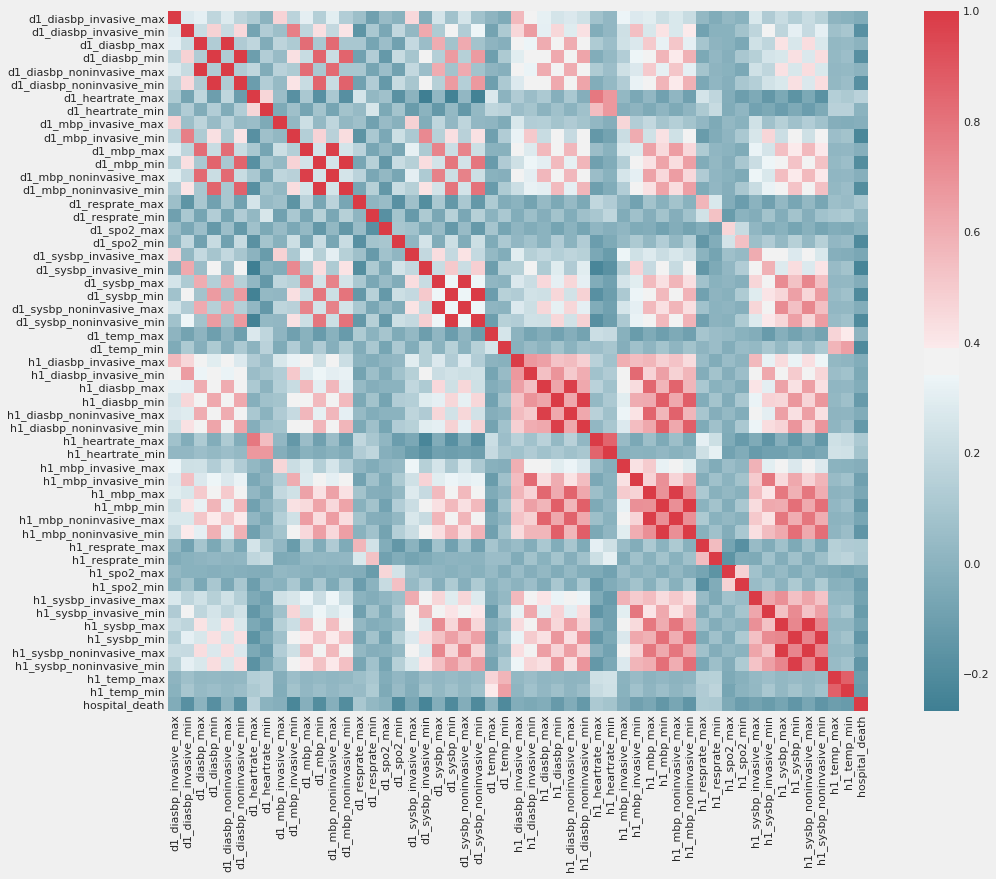

In [0]:
#heat map to check the correlation
f, ax = plt.subplots(figsize=(18, 12))
corr = vitals.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()

___
#### temp

*Higher chance of death for patients with temp under 34 in 1st 24hrs*

___

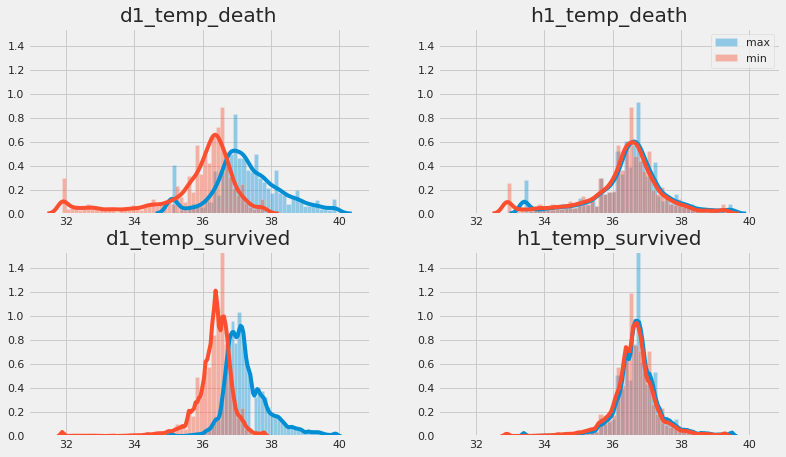

In [0]:
vitals_temp = ['d1_temp_max','d1_temp_min','h1_temp_max','h1_temp_min']
plot_by_target(vitals_temp)

___
##### temp_apache


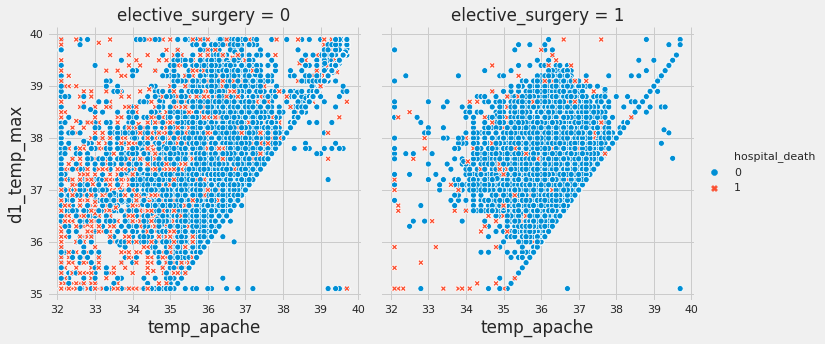

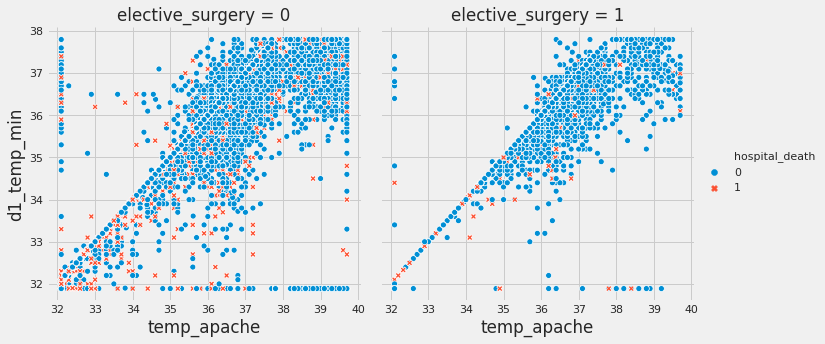

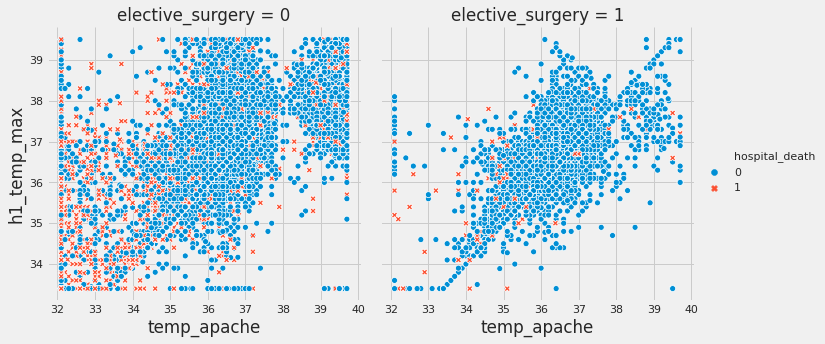

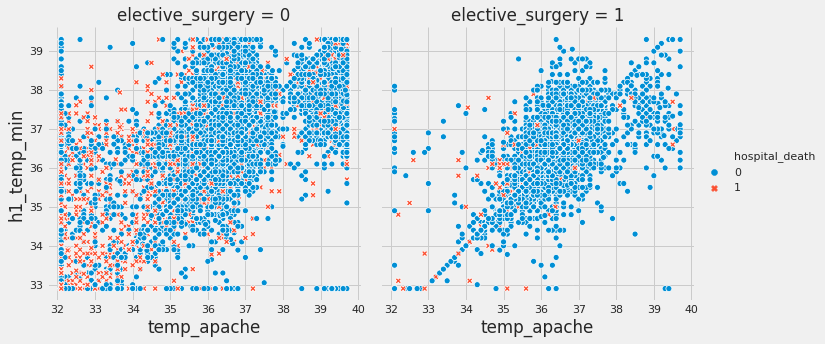

In [0]:
for i in vitals_temp:
  sns.relplot(x="temp_apache", y=i, col = "elective_surgery",hue="hospital_death", style="hospital_death",kind="scatter", data=df)

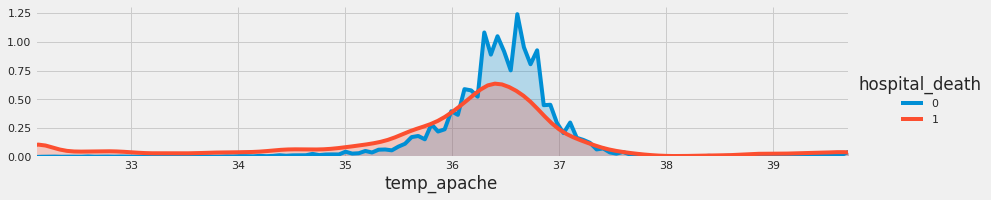

In [0]:
plot_distribution(df,var="temp_apache", target="hospital_death")

____
#### resprate

* Higher prob of death when pesprate min = 0. However, this is not the case for patients who might have aspiration pneumonia or similar disease. This may explain why some patients with resprate_min = 0 but they still alive!

___

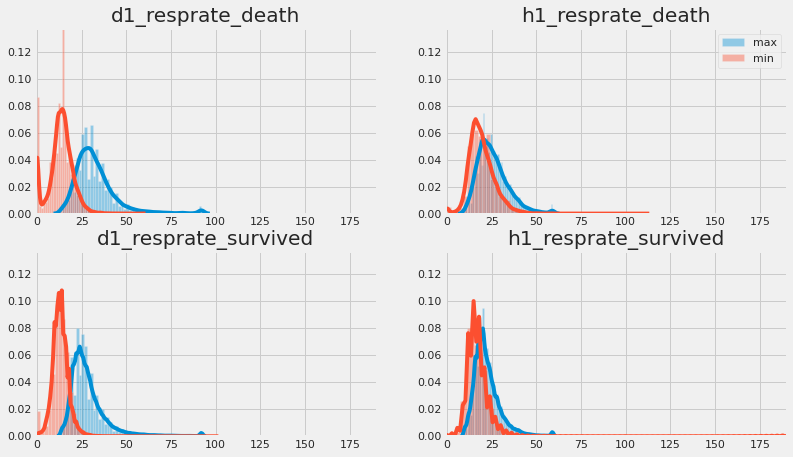

In [0]:
vitals_resprate = ['d1_resprate_max','d1_resprate_min','h1_resprate_max','h1_resprate_min']
plot_by_target(vitals_resprate)

____
##### resprate_apache
* resprate_apache: The respiratory rate measured during the first 24 hours which results in the highest APACHE III score

- There are two different distribution of resprate when plot it together with resprate_apache. Why this is the case? Check how resprate_apache is using in the current apache_system? May be either extreme low or emtreme high value

___

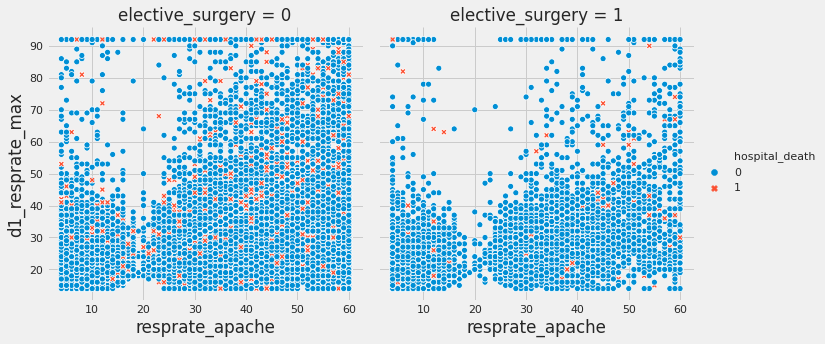

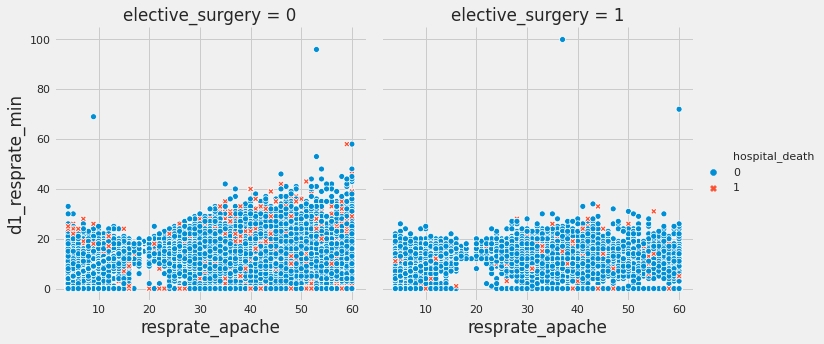

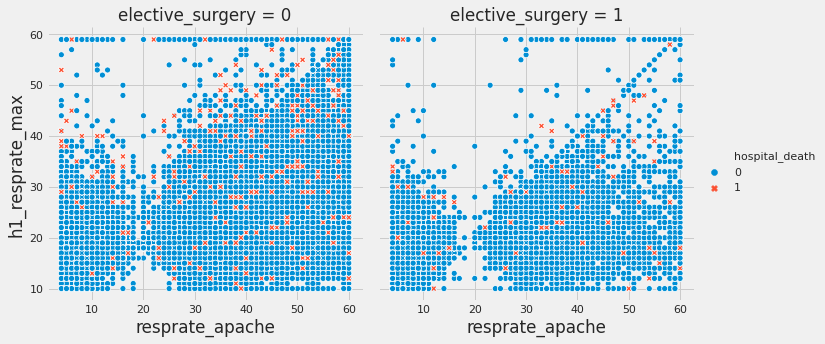

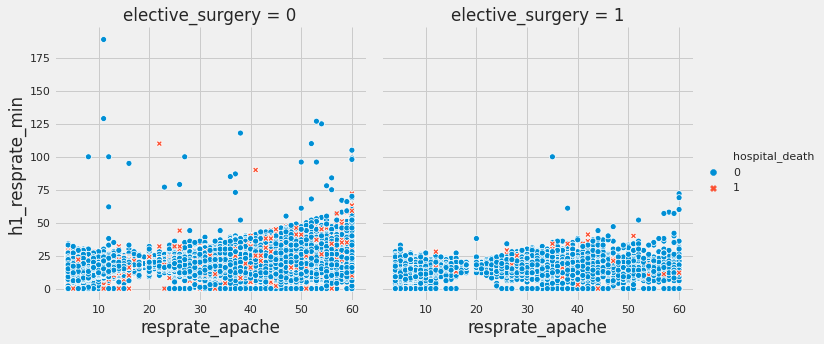

In [0]:
for i in vitals_resprate:
  sns.relplot(x="resprate_apache", y=i, col = "elective_surgery",hue="hospital_death", style="hospital_death",kind="scatter", data=df)

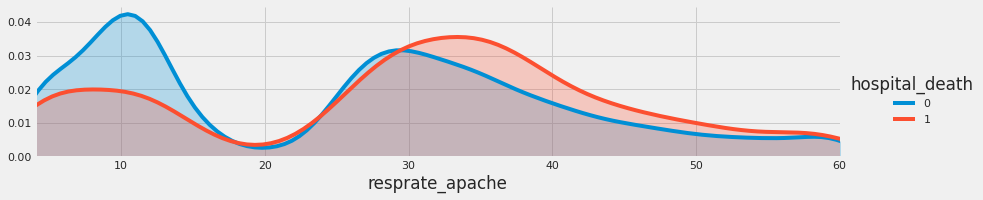

In [0]:
plot_distribution(df,var="resprate_apache", target="hospital_death")

___
#### heartrate

* *as heart_rate_min moves toward 0, the death is closer*
* *also for the emtreme values heart_rate_max ( >160)
___

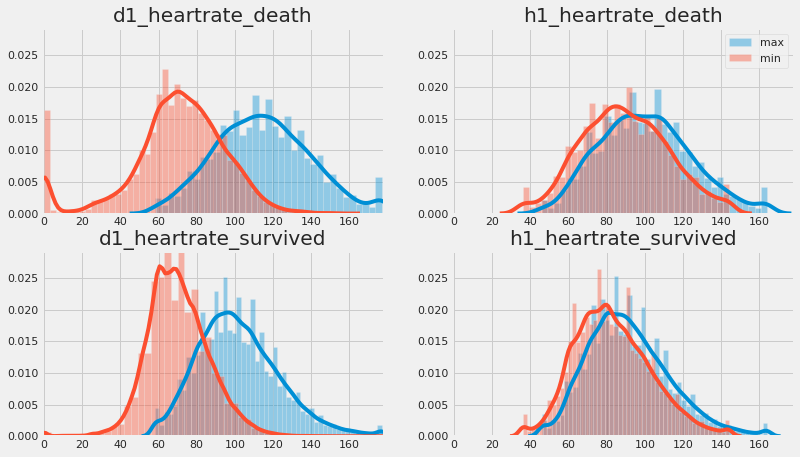

In [0]:
vitals_heartrate = ['d1_heartrate_max','d1_heartrate_min','h1_heartrate_max','h1_heartrate_min']
plot_by_target(vitals_heartrate)

___
##### heart_rate_apache
* heart_rate_apache: The heart rate measured during the first 24 hours which results in the highest APACHE III score

- Similar to resprate_apache. There are two different distribution of heart_rate when plot it together with heart_rate_apache. Why this is the case? Check how heart_rate_apache is using in the current apache_system? May be either extreme low or emtreme high value

____

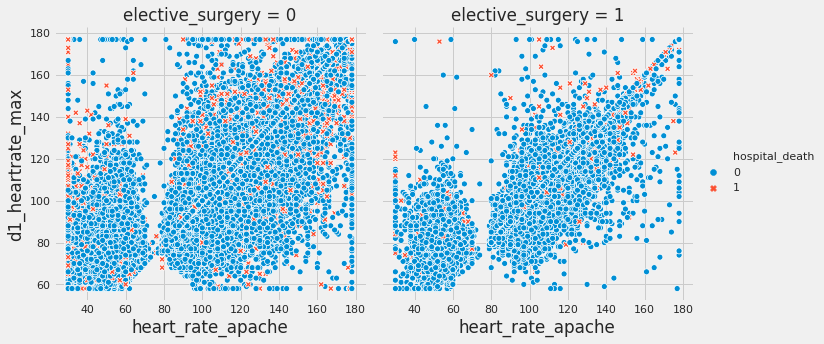

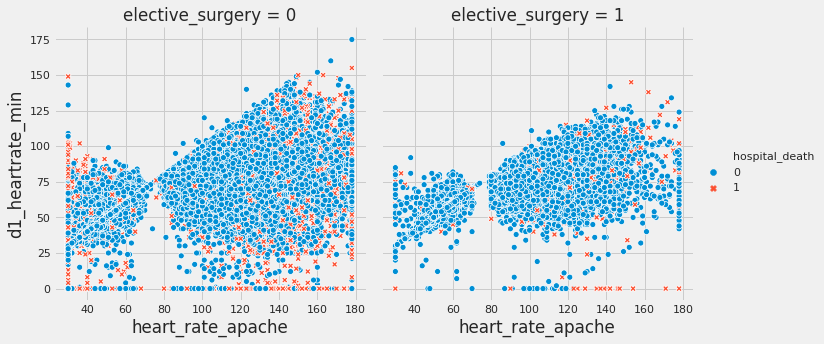

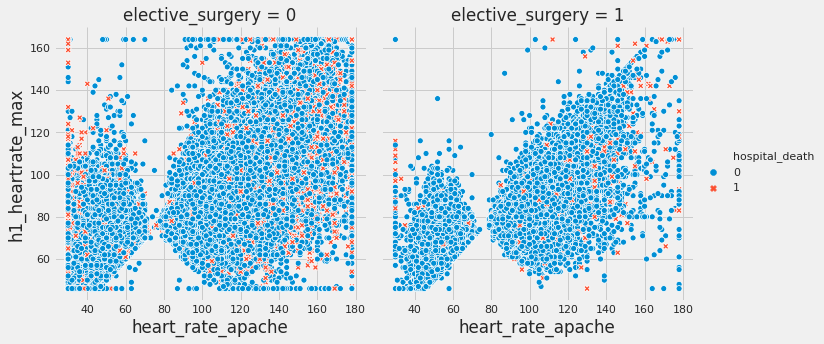

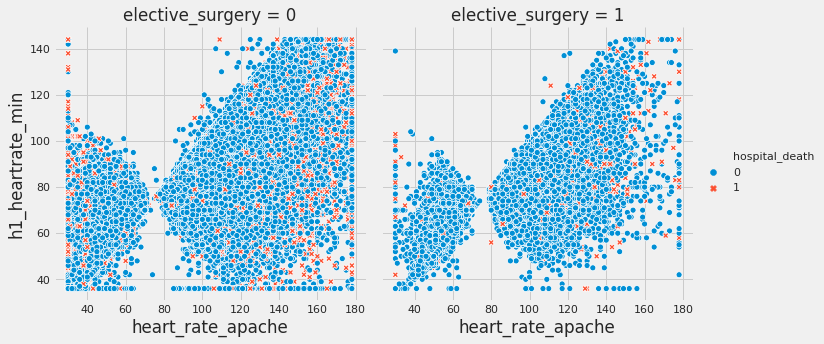

In [0]:
for i in vitals_heartrate:
  sns.relplot(x="heart_rate_apache", y=i, col = "elective_surgery",hue="hospital_death", style="hospital_death",kind="scatter", data=df)

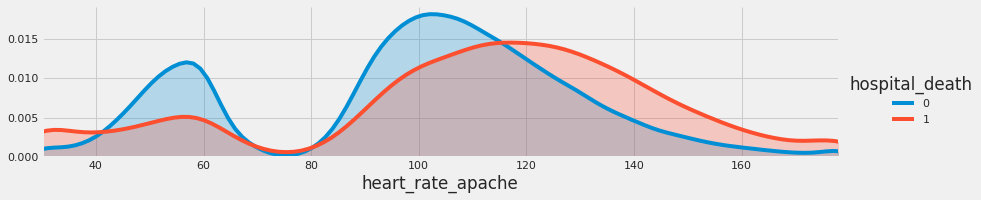

In [0]:
plot_distribution(df,var="heart_rate_apache", target="hospital_death")

____
#### spo2

*Patients with spo2_max around 15-20 have high probability of death*

-Check those who survived with spo2_max <10: what make the different bt <10 and from 15-20 in terms of spo2_max???
___


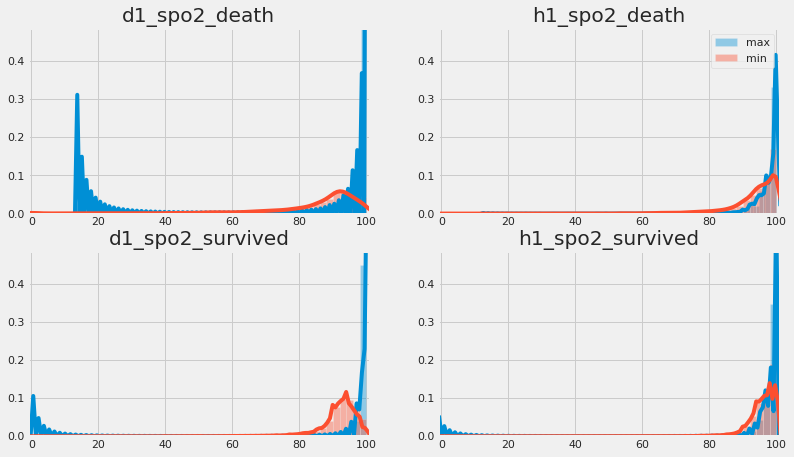

In [0]:
vitals_spo2 = ['d1_spo2_max','d1_spo2_min','h1_spo2_max','h1_spo2_min']
plot_by_target(vitals_spo2)

#### diasbp

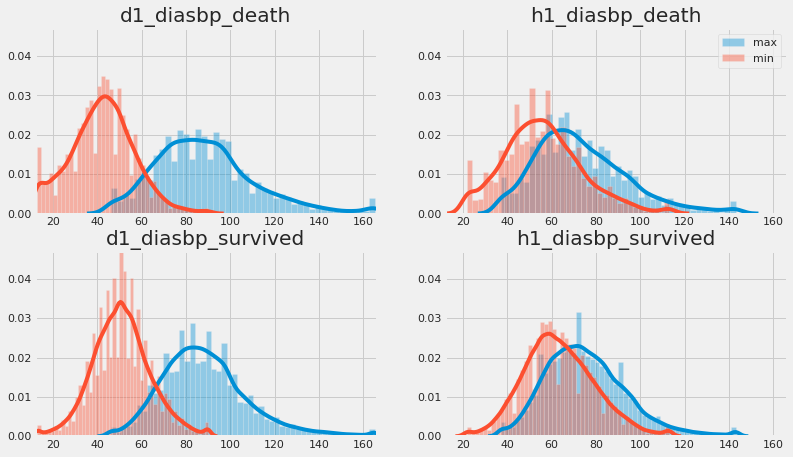

In [0]:
# diasbp
vitals_diasbp = ['d1_diasbp_max','d1_diasbp_min','h1_diasbp_max','h1_diasbp_min']
plot_by_target(vitals_diasbp)

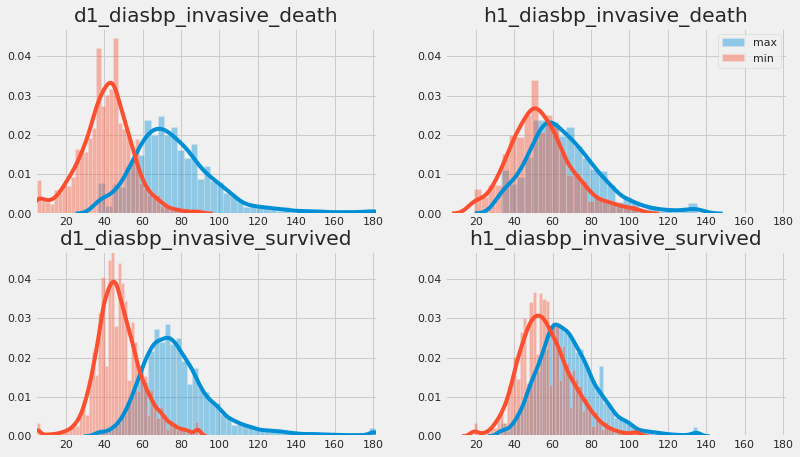

In [0]:
# diasbp_invasive
vitals_diasbp_invasive = ['d1_diasbp_invasive_max','d1_diasbp_invasive_min','h1_diasbp_invasive_max','h1_diasbp_invasive_min']
plot_by_target(vitals_diasbp_invasive)

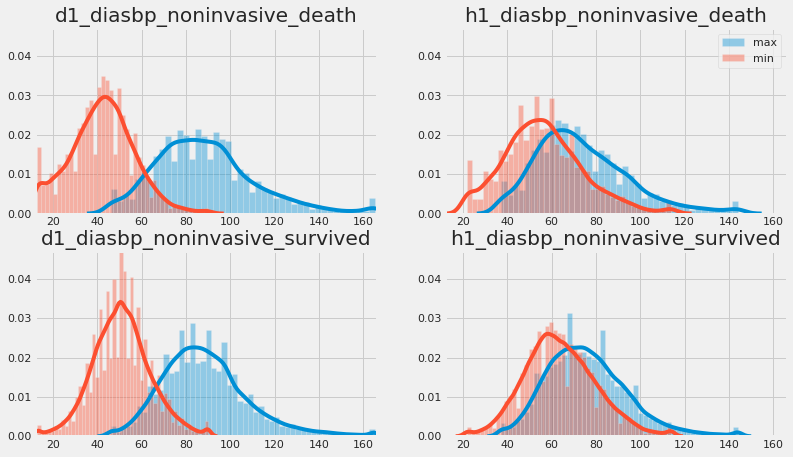

In [0]:
# diasbp_noninvasive
vitals_diasbp_noninv = ['d1_diasbp_noninvasive_max','d1_diasbp_noninvasive_min','h1_diasbp_noninvasive_max','h1_diasbp_noninvasive_min']
plot_by_target(vitals_diasbp_noninv)

___
#### mbp

* *There is a big gap between max and min values.*
* *Patient with mbp_min < 40 has higher chance of death*

___

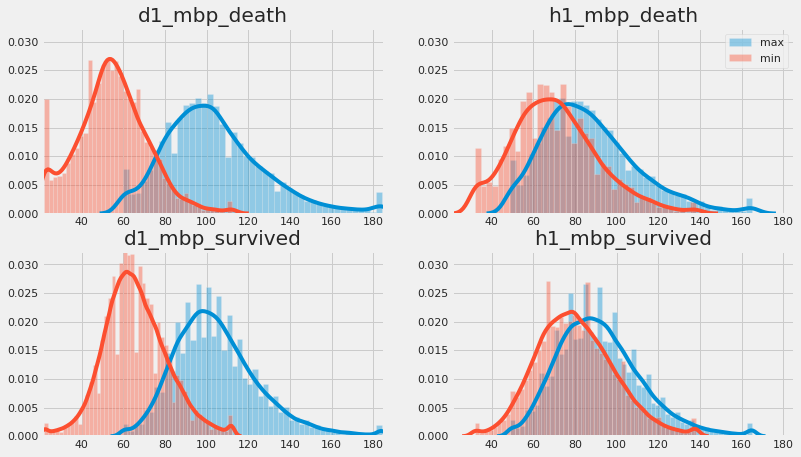

In [0]:
# mbp
vitals_mbp = ['d1_mbp_max','d1_mbp_min','h1_mbp_max','h1_mbp_min']
plot_by_target(vitals_mbp)

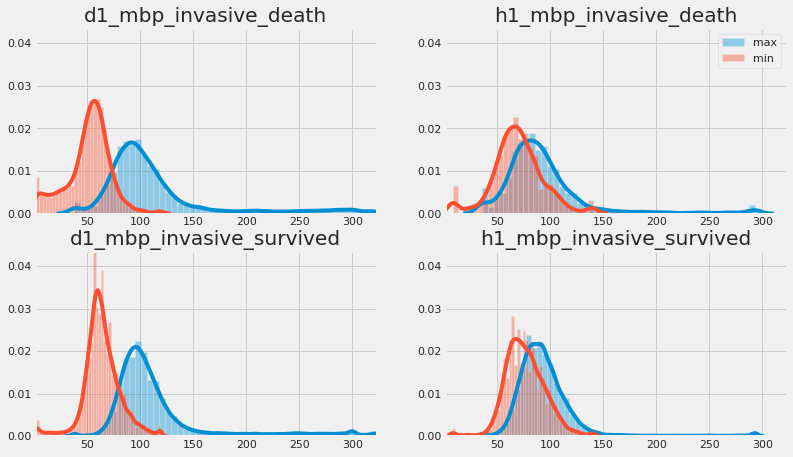

In [0]:
# mbp_invasive
vitals_mbp_inv = ['d1_mbp_invasive_max','d1_mbp_invasive_min','h1_mbp_invasive_max','h1_mbp_invasive_min']
plot_by_target(vitals_mbp_inv)

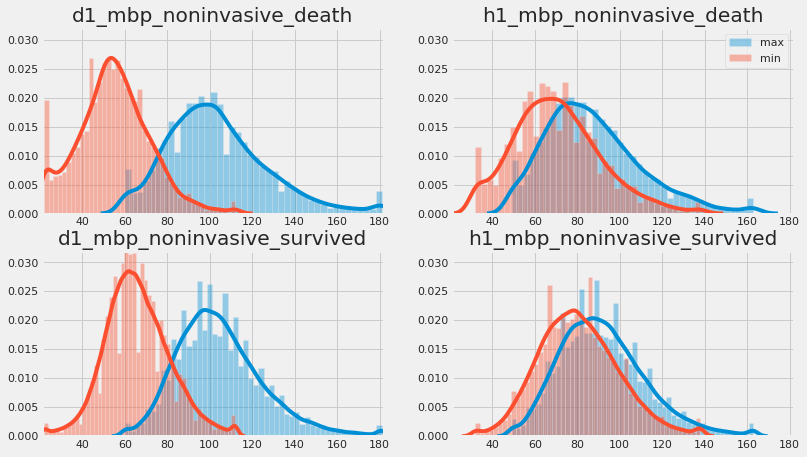

In [0]:
# mbp_noninvasive
vitals_mbp_noninv = ['d1_mbp_noninvasive_max','d1_mbp_noninvasive_min','h1_mbp_noninvasive_max','h1_mbp_noninvasive_min']
plot_by_target(vitals_mbp_noninv)

___
#### sysbp

* *There is a big gap between max and min values.*
* *Patient with sysbp_min <50 has higher chance of death*
___

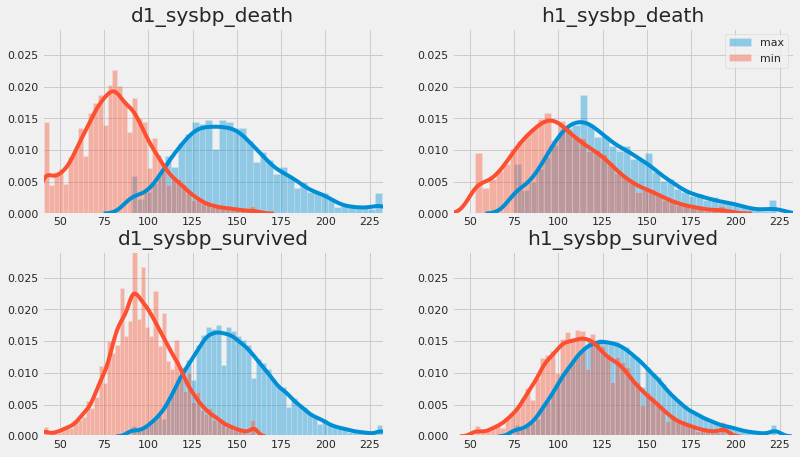

In [0]:
# sysbp
vitals_sysbp = ['d1_sysbp_max','d1_sysbp_min','h1_sysbp_max','h1_sysbp_min']
plot_by_target(vitals_sysbp)

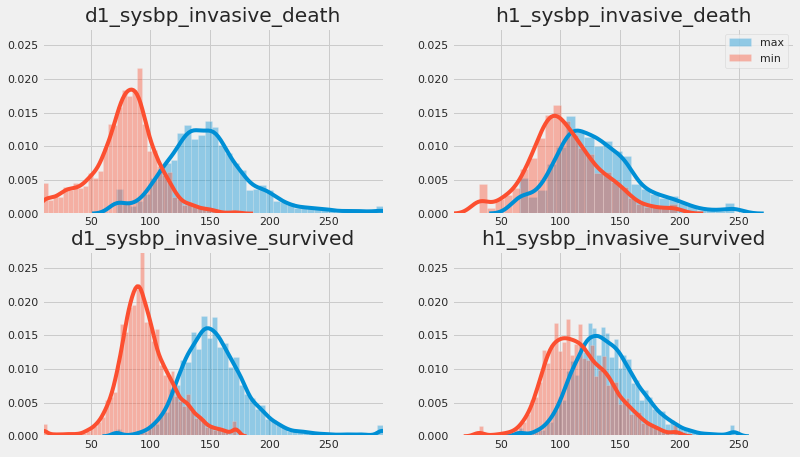

In [0]:
# sysbp_invasive
vitals_sysbp_inv = ['d1_sysbp_invasive_max','d1_sysbp_invasive_min','h1_sysbp_invasive_max','h1_sysbp_invasive_min']
plot_by_target(vitals_sysbp_inv)

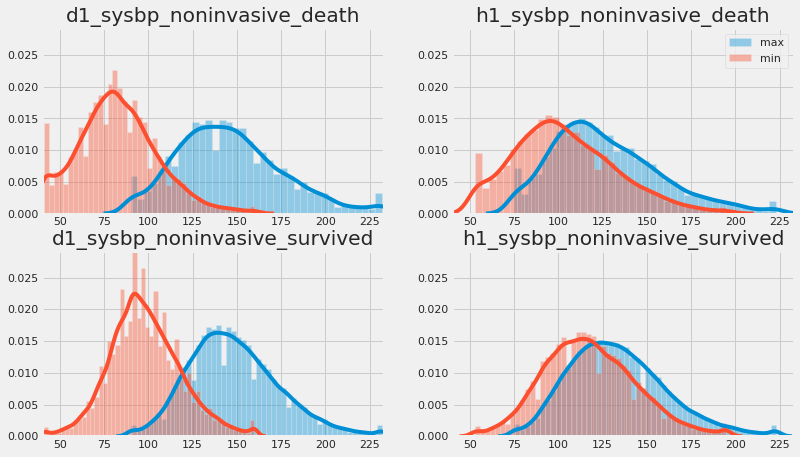

In [0]:
# sysbp_noninvasive
vitals_sysbp_noninv = ['d1_sysbp_noninvasive_max','d1_sysbp_noninvasive_min','h1_sysbp_noninvasive_max','h1_sysbp_noninvasive_min']
plot_by_target(vitals_sysbp_noninv)

In [0]:
stats1 =df.groupby(['apache_3j_bodysystem']).agg({'hospital_death':['sum','count']}).reset_index()
stats1['death_rate']=np.round(stats1['hospital_death']['sum']/stats1['hospital_death']['count']*100,2)
#stats1.sort_values('count',ascending = False,inplace=True)
stats1 = stats1.droplevel(0, axis=1)

stats1 = pd.DataFrame(stats1.values,columns = ['apache_3j_bodysystem','sum','count','death_rate'])
stats1.drop('sum',axis=1,inplace=True)
stats1.sort_values(by='count',ascending=False,inplace=True)
stats1.index = stats1.apache_3j_bodysystem
stats1.drop('apache_3j_bodysystem',axis=1,inplace=True)
stats1

count death_rate
apache_3j_bodysystem                  
Cardiovascular        29999 8.0       
Neurological          11896 7.9       
Sepsis                11740 15.8      
Respiratory           11609 11.2      
Gastrointestinal      9026  7.4       
Metabolic             7650  1.5       
Trauma                3842  6.7       
Genitourinary         2172  6.2       
Musculoskeletal/Skin  1166  4.7       
Hematological         638   9.1       
Gynecological         313   0.6

In [0]:
df.apache_3j_bodysystem.isnull().sum()

1662

___
### 4.Other APACHE scores

- Higher prob of death for those who:
    - was ventilated within 1st 24hrs
    - make no sounds (gcs_verbal)
    - obeys_command (gcs_motor)
    - withdrawal to painful stimuli (gcs_motor)
- However, there is not much different in the boundary of death or survived amongst those who make no movements(gcs_motor)
___

___
##### sedation
* gcs_unable_apache: Whether the Glasgow Coma Scale was unable to be assessed due to patient sedation

In [0]:
sedation = pd.DataFrame(df.groupby(['hospital_death','gcs_unable_apache']).count()['patient_id'].reset_index())
sedation.columns =["hospital_death", "gcs_unable_apache", 'Count']
sedation['Percentage'] = round((sedation['Count']/sedation.Count.sum())*100,2)
sedation

hospital_death  gcs_unable_apache  Count  Percentage
0  0              0.0                 82226 90.7       
1  0              1.0                 662   0.7        
2  1              0.0                 7586  8.4        
3  1              1.0                 202   0.2

___
##### eye | verbal | motor apache


![alt text](https://helpcampus.files.wordpress.com/2014/12/glasgow-coma-scale.png)

___


In [0]:
# eye
eye = pd.DataFrame(df.groupby(['hospital_death','gcs_eyes_apache']).count()['patient_id'].reset_index())
eye.columns =["hospital_death", "gcs_eyes_apache", 'Count']
eye['Percentage'] = round((eye['Count']/eye.Count.sum())*100,2)
eye

hospital_death  gcs_eyes_apache  Count  Percentage
0  0              1.0               5760  6.4        
1  0              2.0               3932  4.4        
2  0              3.0               12654 14.1       
3  0              4.0               59880 66.7       
4  1              1.0               2514  2.8        
5  1              2.0               748   0.8        
6  1              3.0               1209  1.4        
7  1              4.0               3115  3.5

In [0]:
# verbal
verbal = pd.DataFrame(df.groupby(['hospital_death','gcs_verbal_apache']).count()['patient_id'].reset_index())
verbal.columns =["hospital_death", "gcs_verbal_apache", 'Count']
verbal['Percentage'] = round((verbal['Count']/verbal.Count.sum())*100,2)
verbal

hospital_death  gcs_verbal_apache  Count  Percentage
0  0              1.0                 13115 14.6       
1  0              2.0                 1669  1.9        
2  0              3.0                 2932  3.3        
3  0              4.0                 9932  11.1       
4  0              5.0                 54578 60.8       
5  1              1.0                 3626  4.0        
6  1              2.0                 271   0.3        
7  1              3.0                 343   0.4        
8  1              4.0                 1015  1.1        
9  1              5.0                 2331  2.6

In [0]:
# motor
motor = pd.DataFrame(df.groupby(['hospital_death','gcs_motor_apache']).count()['patient_id'].reset_index())
motor.columns =["hospital_death", "gcs_motor_apache", 'Count']
motor['Percentage'] = round((motor['Count']/motor.Count.sum())*100,2)
motor

hospital_death  gcs_motor_apache  Count  Percentage
0   0              1.0                3623  4.0        
1   0              2.0                210   0.2        
2   0              3.0                385   0.4        
3   0              4.0                3675  4.1        
4   0              5.0                6933  7.7        
5   0              6.0                67400 75.0       
6   1              1.0                1920  2.1        
7   1              2.0                99    0.1        
8   1              3.0                139   0.1        
9   1              4.0                819   0.9        
10  1              5.0                1049  1.2        
11  1              6.0                3560  4.0

___
##### intubated | ventilated
* intubated_apache: Whether the patient was intubated at the time of the highest scoring arterial blood gas used in the oxygenation score

* ventilated_apache: Whether the patient was invasively ventilated at the time of the highest scoring arterial blood gas using the oxygenation scoring algorithm, including any mode of positive pressure ventilation delivered through a circuit attached to an endo-tracheal tube or tracheostomy

___



In [0]:
# ventilated
ventilated = pd.DataFrame(df.groupby(['hospital_death','ventilated_apache']).count()['patient_id'].reset_index())
ventilated.columns =["hospital_death", "ventilated_apache", 'Count']
ventilated['Percentage'] = round((ventilated['Count']/ventilated.Count.sum())*100,2)
ventilated 

hospital_death  ventilated_apache  Count  Percentage
0  0              0.0                 58813 64.6       
1  0              1.0                 24355 26.8       
2  1              0.0                 2545  2.8        
3  1              1.0                 5285  5.8

In [0]:
# intubated
intubated = pd.DataFrame(df.groupby(['hospital_death','intubated_apache']).count()['patient_id'].reset_index())
intubated.columns =["hospital_death", "intubated_apache", 'Count']
intubated['Percentage'] = round((intubated['Count']/intubated.Count.sum())*100,2)
intubated

hospital_death  intubated_apache  Count  Percentage
0  0              0.0                72174 79.3       
1  0              1.0                10994 12.1       
2  1              0.0                5063  5.6        
3  1              1.0                2767  3.0

___
#### arf_apache

Whether the patient had acute renal failure during the first 24 hours of their unit stay, defined as a 24 hour urine output <410ml, creatinine >=133 micromol/L and no chronic dialysis

In [0]:
# arf_apache
arf = pd.DataFrame(df.groupby(['hospital_death','arf_apache']).count()['patient_id'].reset_index())
arf.columns =["hospital_death", "arf_apache", 'Count']
arf['Percentage'] = round((arf['Count']/arf.Count.sum())*100,2)
arf

hospital_death  arf_apache  Count  Percentage
0  0              0.0          80956 89.0       
1  0              1.0          2212  2.4        
2  1              0.0          7496  8.2        
3  1              1.0          334   0.4

___
#### post_operative_apache


In [0]:
# post_operative_apache
post_operative = pd.DataFrame(df.groupby(['hospital_death','apache_post_operative']).count()['patient_id'].reset_index())
post_operative.columns =["hospital_death", "apache_post_operative", 'Count']
post_operative['Percentage'] = round((post_operative['Count']/post_operative.Count.sum())*100,2)
post_operative

hospital_death  apache_post_operative  Count  Percentage
0  0               0                      66082 72.0       
1  0               1                      17716 19.3       
2  1               0                      7187  7.8        
3  1               1                      728   0.8

___
#### urineoutput

The total urine output for the first 24 hours

*Patients with urineoutput less than 500 have higher prob of death*

___


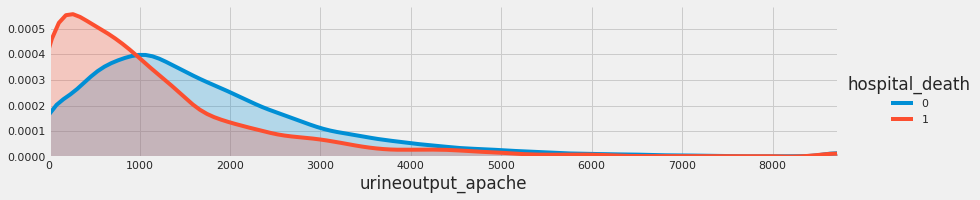

In [0]:
plot_distribution(df,var="urineoutput_apache", target="hospital_death")

___
#### fio2_apache

The fraction of inspired oxygen from the arterial blood gas taken during the first 24 hours of unit admission which produces the highest APACHE III score for oxygenation

*By visualization, this feature does not make much diff bt the probability of death of those who actually died and survived >> raw value would not help much*
___

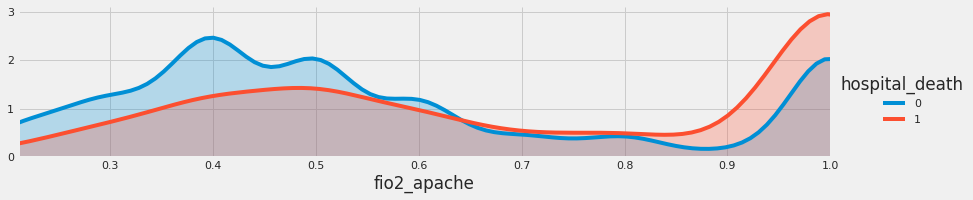

In [0]:
plot_distribution(df,var="fio2_apache", target="hospital_death")

___
#### map_apache
* map_apache: The mean arterial pressure measured during the first 24 hours which results in the highest APACHE III score

*There is a difference bt death and survived in lower tail values*
___

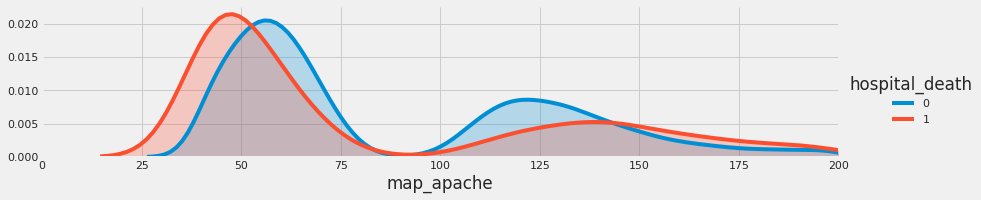

In [0]:
plot_distribution(df,var="map_apache", target="hospital_death")